In [ ]:
!pip install tensorflow

In [ ]:
!pip install transformers

In [ ]:
!pip install accelerate

In [ ]:
!pip install datasets

In [ ]:
! pip install datasets transformers

In [ ]:
!pip install Pillow

In [ ]:
!pip install torch torchvision

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install accelerate -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# pip install transformers[torch]


In [ ]:
# pip install accelerate>=0.20.1

In [ ]:
# !pip install transformers[torch]


In [ ]:
!pip install --upgrade pip setuptools

In [ ]:
# pip install torch

In [ ]:
# pip install --upgrade datasets

In [ ]:
from datasets import load_dataset

dataset = load_dataset("cifar10")

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:325: UserWarning: Downcasting array dtype uint8 to uint8 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")


Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
ex = dataset['train'][400]
ex

{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x7FE130226980>,
 'label': 0}

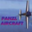

In [ ]:
image = ex['img']
image

In [ ]:
label = dataset['train'].features['label']
label

ClassLabel(names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], id=None)

In [ ]:
label.int2str(ex['label'])

'airplane'

Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

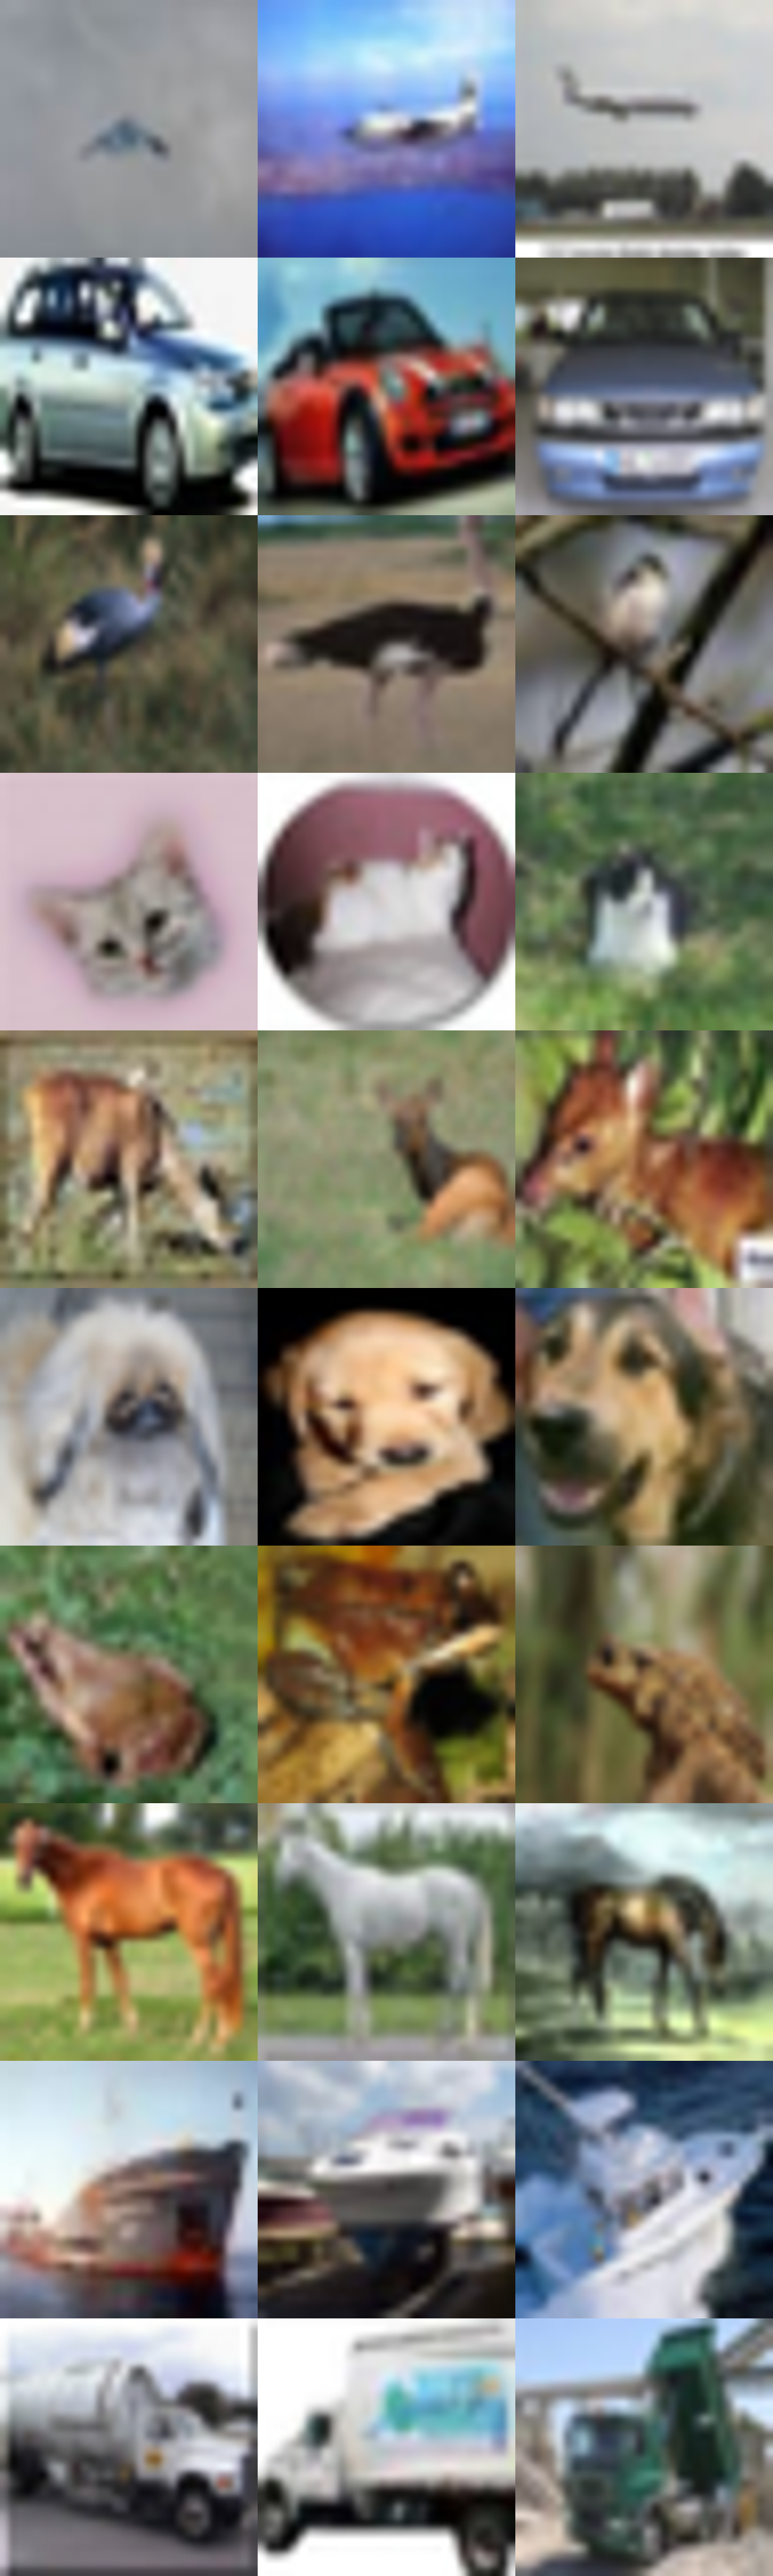

In [ ]:
from transformers.utils.dummy_vision_objects import ImageGPTFeatureExtractor
import random
from PIL import ImageDraw, Image

def show_examples(dataset, seed: int = 1234, examples_per_class: int = 3, size=(350, 350)):

    w, h = size
    label = dataset['train'].features['label'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(label) * h))
    draw = ImageDraw.Draw(grid)

    for label_id, label in enumerate(label):

        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = dataset['train'].filter(lambda ex: ex['label'] == label_id).shuffle(seed).select(range(examples_per_class))

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            image = example['img']
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)

    return grid

show_examples(dataset = dataset, seed=random.randint(0, 1337), examples_per_class=3)

In [ ]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [ ]:
import time
from transformers import ViTFeatureExtractor
from PIL import Image
import numpy as np
from datasets import load_dataset

model_name_or_path = 'google/vit-base-patch16-224'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

# Access CIFAR-10 dataset
dataset = load_dataset("cifar10")

# Define the number of images to process
num_images = 500  # Adjust this number as per your requirement

# Create a subset of the dataset
subset = dataset['train'].select(range(num_images))

# Measure the processing time
start_time = time.time()

# Iterate through the subset and apply feature extraction to each image
for example in subset:
    image = example['img']
    image_array = np.array(image)
    features = feature_extractor(images=image, return_tensors='pt')
    # Do something with the extracted features

end_time = time.time()
processing_time = end_time - start_time

print(f"Processing {num_images} images took {processing_time:.2f} seconds.")


  0%|          | 0/2 [00:00<?, ?it/s]

Processing 500 images took 3.72 seconds.


In [ ]:
from transformers import ViTFeatureExtractor
from PIL import Image
import numpy as np
from datasets import load_dataset

model_name_or_path = 'google/vit-base-patch16-224'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

# Access CIFAR-10 dataset
dataset = load_dataset("cifar10")

# Iterate through the dataset and apply feature extraction to each image
for example in dataset['train']:
    image = example['img']
    image_array = np.array(image)
    features = feature_extractor(images=image, return_tensors='pt')


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
def process_example(example):
    inputs = feature_extractor(example['img'], return_tensors='pt')
    inputs['label'] = example['label']
    return inputs

In [ ]:
process_example(dataset['train'][0])

{'pixel_values': tensor([[[[ 0.3961,  0.3961,  0.3961,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3961,  0.3961,  0.3961,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3961,  0.3961,  0.3961,  ...,  0.2941,  0.2941,  0.2941],
          ...,
          [-0.1922, -0.1922, -0.1922,  ..., -0.2863, -0.2863, -0.2863],
          [-0.1922, -0.1922, -0.1922,  ..., -0.2863, -0.2863, -0.2863],
          [-0.1922, -0.1922, -0.1922,  ..., -0.2863, -0.2863, -0.2863]],

         [[ 0.3804,  0.3804,  0.3804,  ...,  0.2784,  0.2784,  0.2784],
          [ 0.3804,  0.3804,  0.3804,  ...,  0.2784,  0.2784,  0.2784],
          [ 0.3804,  0.3804,  0.3804,  ...,  0.2784,  0.2784,  0.2784],
          ...,
          [-0.2471, -0.2471, -0.2471,  ..., -0.3412, -0.3412, -0.3412],
          [-0.2471, -0.2471, -0.2471,  ..., -0.3412, -0.3412, -0.3412],
          [-0.2471, -0.2471, -0.2471,  ..., -0.3412, -0.3412, -0.3412]],

         [[ 0.4824,  0.4824,  0.4824,  ...,  0.3647,  0.3647,  0.3647],
          [ 0

In [ ]:
dataset = load_dataset('cifar10')

def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x for x in example_batch['img']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['label'] = example_batch['label']
    return inputs

prepared_ds = dataset.with_transform(transform)

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
prepared_ds = dataset.with_transform(transform)
# prepared_ds = prepared_ds[0:400]

In [ ]:
# prepared_ds["train"] = prepared_ds["train"][:500]  # Get the first 500 images for training
# prepared_ds["test"] = prepared_ds["test"][:200]

In [ ]:
prepared_ds

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})

In [ ]:
import torch


def collate_fn(batch):
    # print(batch)
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }


In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

In [ ]:
from transformers import ViTForImageClassification

label = dataset['train'].features['label'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(label),
    id2label={str(i): c for i, c in enumerate(label)},
    label2id={c: str(i) for i, c in enumerate(label)},
    ignore_mismatched_sizes=True
)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([10]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [ ]:
from transformers import TrainingArguments
from transformers import TrainingArguments, Trainer
import transformers
import accelerate

training_args = TrainingArguments(
  output_dir="./vit-base-cifar10-demo-v5",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

In [ ]:
# !pip install accelerate>=0.20.1

In [ ]:
# !pip install --no-cache-dir accelerate>=0.20.1 transformers[torch]

In [ ]:
# !pip show accelerate

In [ ]:
from transformers import Trainer

# print(prepared_ds)
# print(training_args)
train_subset = prepared_ds["train"].select(range(400))
test_subset = prepared_ds["test"].select(range(200))

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=train_subset,
    eval_dataset=test_subset,
    tokenizer=feature_extractor,
)
train_results = trainer.train()


Step,Training Loss,Validation Loss,Accuracy
100,0.002300,0.315967,0.935000


In [ ]:
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

***** train metrics *****
  epoch                    =         4.0
  total_flos               = 115480342GF
  train_loss               =      0.2456
  train_runtime            =  0:58:38.93
  train_samples_per_second =       0.455
  train_steps_per_second   =       0.028


In [ ]:
metrics = trainer.evaluate(test_subset)
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =      0.935
  eval_loss               =      0.316
  eval_runtime            = 0:02:25.58
  eval_samples_per_second =      1.374
  eval_steps_per_second   =      0.172


In [ ]:
# from transformers import AutoImageProcessor
# # import torch
# # from datasets import load_dataset

# # dataset = load_dataset("cifar10")
# images = dataset["test"]["img"]
# labels = dataset["test"]["label"]

# # Create a mapping dictionary for label conversion
# label_mapping = {
#     0: "airplane",
#     1: "automobile",
#     2: "bird",
#     3: "cat",
#     4: "deer",
#     5: "dog",
#     6: "frog",
#     7: "horse",
#     8: "ship",
#     9: "truck"
# }
# if 3 not in label_mapping:
#     label_mapping[3] = "cat"  # Add the string label for value 3

# image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
# # model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

# predictions = []
# predictions_labels = []
# true_labels = []
# correct_predictions = 0

# print(labels)

# for i in range(5):
#     image = images[i]
#     inputs = image_processor(image, return_tensors="pt")
#     with torch.no_grad():
#         logits = model(**inputs).logits
#     predicted_label = logits.argmax(-1).item()
#     predicted_class =  model.config.id2label[predicted_label]
#     predictions.append(predicted_class)
#     predictions_labels.append(predicted_label)
#     # true_labels.append(labels[i])  # Convert true label to string
#     true_labels.append(label_mapping[labels[i]])  # Convert true label to string
#     if true_labels[i] in predicted_class:
#         correct_predictions += 1
#     print(predicted_class , "-->", true_labels[i])

# print(predictions)
# print(true_labels)
# print(labels)
# print(predictions_labels)
# accuracy = correct_predictions / len(true_labels)
# print("Accuracy:", accuracy)
